<a href="https://colab.research.google.com/github/TylerFeemster/SafariNet/blob/main/Original.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>SML 301 Final Project<center>

## Objective

Machine learning is a rapidly evolving field.  Thus, part of the requirement of being a successful machine learning data scientist is to keep up with the state of the art machine learning techniques in the research literature.  Part of the goal of this project is to prepare you for doing independent research.  In some parts of this project, you might be asked to read the material on a topic that you are not totally familiar and apply the techniques that you learned from the reading.

## Introduction

In this project we are interested in building a model that predicts the types of animals and the number of animals shown on images in the *Wild* dataset.  We will deviate from the approach used by [Parham et al.](https://ieeexplore.ieee.org/document/8354227) and employ a less complicated method inspired by the one used in [*Learn to Classify and Count: A Unified Framework for Object Classification and Counting*](https://dl.acm.org/doi/abs/10.1145/3191442.3191459) by Song and Qui instead.

The unique names of the animals of interest are stored in the list `reduced_classes` below. For each image, our goal is to identify the animals shown on the image and count how many there are.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
_ = !unzip 'drive/My Drive/wild.zip'
print('Complete')

Mounted at /content/drive


In [ ]:
reduced_classes = ['giraffe_reticulated','zebra_grevys','turtle_sea',
                  'zebra_plains','giraffe_masai', 'whale_fluke']


In Precept 10 we have created two collections of files to store the NumPy arrays:

* `classify_arr`: with 0 and 1 elements classifying if an animal in `reduced_classes` shows up on the image  
* `count_arr`: with integers counting how many animals showing up on the image for each animal in `reduced_classes`

## Question 1 Data quality check and EDA

### Part a

Provide code and output to verify that you have 5,784 files in each of the *class_annotations* and *count_annotations* folders.

Note: you might see 5,786 files in *class_annotations*.  However, if you check (and please do check this to be sure), you will see that the images ID's shown in *class_annotations* but not in *class_annotations* are `.DS_Store` and `..npy`.  You can ignore these two files.

In [ ]:
import os
import numpy as np
import pandas as pd

import cv2 # an image and video processing library
from PIL import Image # Python Imaging Library

import matplotlib.pyplot as plt
%matplotlib inline

**Answers**

In [ ]:
count_file_names = os.listdir('wild/count_annotations')
class_file_names = os.listdir('wild/class_annotations')
print(len(count_file_names))
print(len(class_file_names))

5784
5784


### Part b

Print the contents of the following files in the *class_annotations* and *count_annotations* folders by modifying the path to the folders in the cells following the next cell. Please check that your results match the ones provided below.

In [ ]:
# names of the files we will use for inspection
file_names_subset = ['2018_002805.npy', '2018_000974.npy', '2018_000960.npy', '2018_002811.npy', '2018_004290.npy',
                    '2018_002839.npy', '2018_003299.npy', '2018_002187.npy', '2018_000948.npy', '2018_000790.npy',
                    '2018_001483.npy', '2018_000789.npy', '2018_000951.npy', '2018_001497.npy', '2018_003280.npy']

In [ ]:
# Please modify the path below to print `classify_arr` in each file

for file in file_names_subset:
    print(np.load('wild/class_annotations/' + file))

[1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 1. 0.]
[0. 0. 0. 0. 1. 0.]
[1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0.]
[0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1. 0.]


Your outputs for `classify_arr` should match the following.

```python
[1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 1. 0.]
[0. 0. 0. 0. 1. 0.]
[1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0.]
[0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1. 0.]
```

In [ ]:
# Please modify the path below to print `count_arr` in each file

for file in file_names_subset:
    print(np.load('wild/count_annotations/' + file))

[4. 0. 0. 0. 0. 0.]
[0. 0. 0. 3. 1. 0.]
[0. 0. 0. 0. 1. 0.]
[1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 2. 0.]
[0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 2. 0.]
[0. 0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 1. 0.]
[0. 0. 0. 2. 0. 0.]
[0. 0. 0. 0. 1. 0.]


Your outputs for `count_arr` should match the following.

```python
[4. 0. 0. 0. 0. 0.]
[0. 0. 0. 3. 1. 0.]
[0. 0. 0. 0. 1. 0.]
[1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 2. 0.]
[0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 2. 0.]
[0. 0. 0. 0. 1. 0.]
[0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 1. 0.]
[0. 0. 0. 2. 0. 0.]
[0. 0. 0. 0. 1. 0.]
```

### Part c

We would like to know how many animals show up in an image in general.

(i.) What is the minimum and maximum of this number?  
(ii.) Please make a histogram for the number of animals in an image.   
(iii.) Is this distribution symmetric or does it have a long left/right tail?  

Hint: You can find sample code online on how  to make a histogram with a list, such as [this](https://stackoverflow.com/questions/33203645/how-to-plot-a-histogram-using-matplotlib-in-python-with-a-list-of-data).  Please modify the code to suit your needs.  Also, please use counts for the y-axis.  For all graphs that you make for this report, the plots should have clear labels and be informative.

**Answer**

In [ ]:
num_obs = 5784
num_animals = [0] * num_obs
for idx, file in enumerate(count_file_names):
  array = np.load('wild/count_annotations/' + file)
  num_animals[idx] = array.sum()

(i)

In [ ]:
print('max: ' + str(np.max(num_animals)))
print('min: ' + str(np.min(num_animals)))

max: 22.0
min: 1.0


(ii)

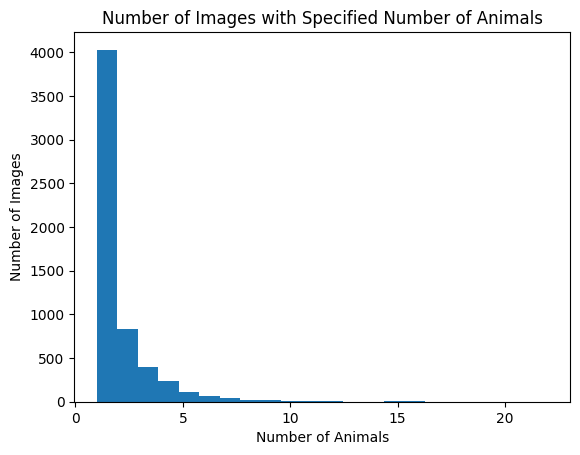

In [ ]:
plt.hist(num_animals, bins=22) # min=1 & max=22, so bins=22 shows all
plt.title('Number of Images with Specified Number of Animals')
plt.xlabel('Number of Animals')
plt.ylabel('Number of Images')
plt.show()

(iii) The above histogram has a long right tail. In fact, about 4000 of the 5784 images show just one animal, the minimum number.

### Part d

For each of the six species, create a histogram for the number of animals belonging to that species.  Instead of making 6 histograms, please make one histogram with stacked bins instead (see https://stackoverflow.com/questions/18449602/create-stacked-histogram-from-unequal-length-arrays). This makes it easier to compare the figures across all 6 categories.  Use counts for the y-axis.

Among the 6 animals that we are interested, do any of them show up more frequently than other ones in the images? (You might need to make additional graph(s) that "zoom in" to certain region of the histogram if one single graph does not show all the details.)

**Answer**

In [ ]:
num_animals = np.zeros((num_obs, 6))
idx = 0
for file in count_file_names:
  array = np.load('wild/count_annotations/' + file)
  for i in range(6):
    num_animals[idx, i] = array[i]
  idx += 1

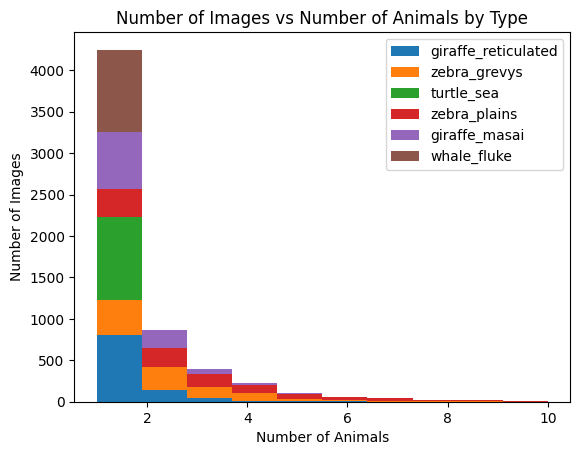

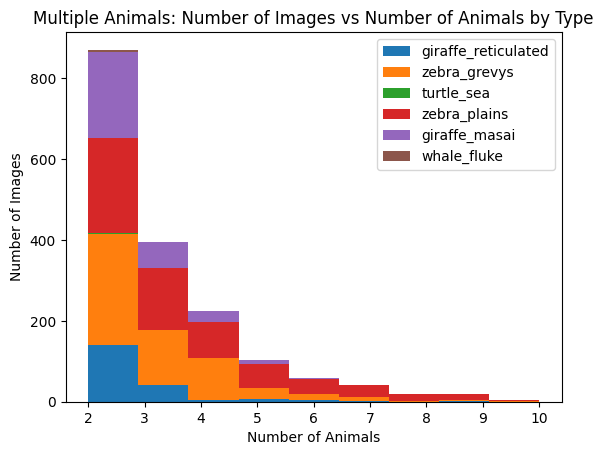

In [ ]:
plt.hist(num_animals, bins=10, range=(1,10), stacked=True)
plt.legend(reduced_classes)
plt.title('Number of Images vs Number of Animals by Type')
plt.xlabel('Number of Animals')
plt.ylabel('Number of Images')
plt.show()

plt.hist(num_animals, bins=9, range=(2,10), stacked=True)
plt.legend(reduced_classes)
plt.title('Multiple Animals: Number of Images vs Number of Animals by Type')
plt.xlabel('Number of Animals')
plt.ylabel('Number of Images')
plt.show()

Fluke whales and sea turtles are almost always seen alone. Using the second graph, we see that both types of giraffes appear in groups of up to about 3-4. Likewise, we see both types of zebras appearing in groups of up to 7-9. For each species, there are pictures showing more, but numbers exceeding the upper range we give here are rare.

## Question 2 Build the custom datasets object

Recall that in Ch 8.7 we load the `MNIST` dataset into Python with the `torchvision.datasets` funtion/object and we further divide the dataset into training and validation batches by using the `torch.utils.data.DataLoader` function/object.  For this project, we will need to create the custom version of `torchvision.datasets`, because we are now dealing with a custom dataset that is not built in `PyTorch`.

Please install the `opencv` library with the following code.  It is possible that you might also need to update your `pip` depending on its version.

In [ ]:
# Install opencv for cv2:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Please read [this tutorial](https://medium.com/analytics-vidhya/creating-a-custom-dataset-and-dataloader-in-pytorch-76f210a1df5d) on how to define a custom Dataset-class object.  Note that in place of the `glob()` function mentioned in the tutorial, we will use the `read_csv()` function from `pandas` instead.

Here we will define a custom `Datasets` class.  The goal of our custom Dataset-class object is to read the images from the `JPEGImages` folder, resize the images to `img_size`, normalize the pixel values to range (0,1) for each image and then subtract the predefined mean, and divide by the predefined standard deviation. For targets corresponding to the classification and counting tasks, we would like to link the image with corresponding labels from the two .npy files created previously. Lastly, we will use the ID's provided in train.txt, val.txt, test.txt in the *Imagesets/Main* folder to divide the images for training, validation and testing purposes.


The cell below provides the most of the code for creating the custom `Datasets` class. Please

* replace all the directory paths below with paths that that are relevant to your computer system  
* fill in all the parts that labeled with `...`

In [ ]:
from PIL import Image # Python Imaging Library
import cv2 # an image and video processing library
from torch.utils.data import Dataset
from torchvision import transforms
from torch.utils.data import DataLoader

class ClassifyCountDataset(Dataset):
    def __init__(self, dataset_type, img_size):

        self.img_path = 'wild/JPEGImages/'
        self.classify_path = 'wild/class_annotations/'
        self.count_path = 'wild/count_annotations/'

        # means and sds of images from ImageNet
        train_mean, train_sd = [0.4914, 0.4822, 0.4465], [0.247, 0.243, 0.261]
        self.transforms = transforms.Compose([
            transforms.Resize((img_size,img_size)),
            transforms.ToTensor(),
            transforms.Normalize(train_mean, train_sd)
        ])
        self.files = pd.read_csv('wild/ImageSets/Main/{}.txt'.format(dataset_type),header=None)[0].tolist()

    def __getitem__(self, index):
        file = self.files[index]
        # cv2.imread() method loads an image;
        # Image.fromarray() converts the image format from OpenCV to PIL;
        # .astype(np.uint8) rescale the image pixels to a  more appropriate format
        # (in more details: it converts whatever you give it first
        # to an integer and then to a 8 bit integer (from 0 to 255)
        # by the modulo 256  operation.)
        img = self.transforms(Image.fromarray(cv2.imread(self.img_path+file+'.jpg').astype(np.uint8)))
        # torch.from_numpy() creates a Tensor from a numpy.ndarray.
        classify_target = torch.from_numpy(np.load(self.classify_path+file+'.npy'))
        count_target = torch.from_numpy(np.load(self.count_path+file+'.npy'))

        return img, classify_target, count_target

    def __len__(self):
        return len(self.files)

Please answer the following questions about the `ClassifyCountDataset` class in your report to demonstrate that you understand the concepts explained in the tutorial:

* Describe how `self.files` is calculated.  (Hint: The values that we will assign to `dataset_type` are usually one of these: 'test', 'train', 'trainval', 'val'.)
* Describe the values `self.files` stores when `dataset_type` is set to 'test', and provide a few examples of these values.  
* Describe what steps we take to make `img` (i.e., what the original object is and what steps we take to process the original object) .
* Describe what `classify_target` is and where it is from.

**Answers**

* In the folder wild/ImageSets/Main, there are four text files: test, train, trainval, and val. Inside of these files are strings (e.g., '2018_000118' is inside of test.txt). Then, self.files stores this string and sets dataset_type to the name of the .txt file it is in. For instance, '2018_000118' is stored in self.files and is put into the testing set, or more precisely, dataset_type is set to 'test' (because '2018_000118' is in test.txt).
* The stored values of self.files with dataset_type = 'test' are the strings in wild/ImageSets/Main/test.txt, e.g. '2018_000118' and '2018_002280'.
* Given the (string) value of self.files[-], we take the corresponding image in the JPEGImages folder. This is turned into an array (with 8-bit unsigned integer(uint8) values) and back to image (pixels with 3 uint8 values from 0-255 corresponding to rgb). Then, we then resize, turn it to a tensor with values in [0,1], and normalize according to the mean and std.
* classify_target is the response array we will need for training and testing, the length 6 binary array telling us which species are in the image. Given the (string) value stored in self.files[-], we load the corresponding array in the class_annotations folder.

## Question 3 Model architecture

In this section we will define a convolutional neural network (CNN) that predicts the animals shown on a image, as well as the counts for each animal.  Because our CNN is supposed to produce two different kinds of outputs (animal class identifications and animal counts for each class) our CNN needs to be structured accordingly.


Skim through the Introduction section and read section 3.1 of the paper [*Learn to Classify and Count: A Unified Framework for Object Classification and Counting*](https://dl.acm.org/doi/abs/10.1145/3191442.3191459) by Song and Qui.  This should give you a better idea of the structure of the network that we are going to build since our CNN will have an architecture similar to the network in the paper but simpler.  Following similar steps as the ones in the paper, we will build a CNN that has 2 output branches.  Just as the method described in the paper, we will train the upstream layers jointly.  However, instead of using the famous [VGG-16](https://builtin.com/machine-learning/vgg16) network architecture for the upstream layers, we will only borrow the architecture of the first few layers of VGG-16.  This is because VGG-16 has approximately 138 millions of hyperparameters and it will take a long time to train the entire VGG-16.  

The code in the next cell provides you the partial code for building the network for this project.  Please fill in the parts labeled with `...`.  There might be more than one entry needed for each `...`.  You can assume that the input images are of size 128 x 128.

[Batch normalization](https://datahacker.rs/017-pytorch-how-to-apply-batch-normalization-in-pytorch/) is a popular technique used for improving deep neural network performance.  We will use the [torch.nn.BatchNorm2d() function](https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm2d.html) to do batch normalization and keep the default values for its input arguments.  Note that batch normalization does not change the shape of its input or output.

Just a reminder: The `nn.Sequential()` function was discussed in Chapter 8.5 of the lecture notes.

I have described the architecture of the network below:

For **block 1**:

* first layer:
    + a convolutional layer with 64 channels with (5 x 5) filters (kernels) with no padding; batch normalization; activation function: relu.

* second layer:
    + a convolutional layer with 64 channels with (5 x 5) filters; batch normalization; activation function: relu.
    + a maximum pooling layer with (2 x 2 filter), each time move the filter 2 steps when moving horizontally and vertically, no padding


For **block 2**:

* first layer:
    + a convolutional layer with 128 channels with (5 x 5) filters with no padding; batch normalization; activation function: relu.

* second layer:
    + a convolutional layer with 128 channels with (5 x 5) filters with no padding; batch normalization; activation function: relu.
    + a maximum pooling layer with (2 x 2 filter), each time move the filter 2 steps when moving horizontally and vertically, no padding


For each of the **branches**

The following two layers are coded with the *self.branches.append()* function

* first layer:
    + a convolutional layer with 128 channels with (3 x 3) filters with one row/column of zeros added to all four sides of the input; batch normalization; activation function: relu.

* second layer:
    + a convolutional layer with 128 channels with (3 x 3) filters with one row/column of zeros added to all four sides of the input; batch normalization; activation function: relu.
    + a maximum pooling layer with (2 x 2 filter), each time move the filter 2 steps when moving horizontally and vertically, no padding

Third layer: flatten

The following layers are coded with the *self.outputs.append()* function


* fourth layer:
    + dense layer with 256 neurons; activation function: relu
    + dropout rate: 50%

    
* output layer.




In [ ]:
import torch
import torch.nn as nn

In [ ]:
class VGG16Counting(nn.Module):
    def __init__(self, num_classes=...):
        super(VGG16Counting, self).__init__()
        # 128 x 128 object
        self.block1 = nn.Sequential(nn.Conv2d(3, 64, 5),
                                    nn.BatchNorm2d(64), nn.ReLU(),
                                    nn.Conv2d(64, 64, 5),
                                    nn.BatchNorm2d(64), nn.ReLU(),
                                    nn.MaxPool2d(2))
        # 60 x 60 object
        self.block2 = nn.Sequential(nn.Conv2d(64, 128, 5),
                                    nn.BatchNorm2d(128), nn.ReLU(),
                                    nn.Conv2d(128, 128, 5),
                                    nn.BatchNorm2d(128), nn.ReLU(),
                                    nn.MaxPool2d(2))
        # 26 x 26 object

        #### create 2 branches below ####

        # initialize two PyTorch lists;
        # ModuleList() is like the native python list container [], but it is for PyTorch.
        self.branches, self.outputs = nn.ModuleList(), nn.ModuleList()
        for _ in range(2):
            # 26 x 26 object
            self.branches.append(nn.Sequential(nn.Conv2d(128, 128, 3, padding=1),
                                               nn.BatchNorm2d(128), nn.ReLU(),
                                               nn.Conv2d(128, 128, 3, padding=1),
                                               nn.BatchNorm2d(128), nn.ReLU(),
                                               nn.MaxPool2d(2)))
            # 13 x 13 object with 128 channels
            self.outputs.append(nn.Sequential(nn.Linear(13 * 13 * 128 * 2, 256),
                                              nn.ReLU(), nn.Dropout(0.5),
                                              nn.Linear(256, 6)))

    def forward(self, x):

        x = self.block2(self.block1(x))
        # print(x.shape)

        # torch.cat() concatenates the given sequence of seq tensors in the given dimension
        x = torch.cat([torch.flatten(branch(x), start_dim=1) for branch in self.branches], 1)

        outputs = [output(x) for output in self.outputs]

        return outputs

## Question 4 Model training

### Part a

In this part of the question we will define the `train()` function for training the model.  Please fill in the parts labeled with `...` for `train()`. A [confusion matrix](https://www.geeksforgeeks.org/confusion-matrix-machine-learning/) is often useful for evaluating the performance of a model.

Besides filling in the places labeled with `...`, modify the `train()` function so that we can later make plots to show that we did not overfit the model (see Part e).

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, mean_squared_error, roc_auc_score

def train(model, optimizer, train_dataloader, val_dataloader, num_epochs=100):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    mse_criterion = nn.MSELoss()
    bce_criterion = nn.BCEWithLogitsLoss()

    epoch_roc_aucs = np.zeros((num_epochs, 6))
    epoch_relrmse = np.zeros((num_epochs, 6))
    for epoch in range(1, num_epochs + 1):
        model.train()  # Set model to training mode
        for batch_i, (imgs,targets_classify,targets_counts) in enumerate(train_dataloader):
            run_id = str(epoch) + ': ' + str(batch_i)
            print(run_id)

            imgs,targets_classify,targets_counts = imgs.to(device),targets_classify.to(device).float(),targets_counts.to(device).float()
            outputs = model(imgs)
            bce_loss = bce_criterion(outputs[0], targets_classify)
            mse_loss = mse_criterion(outputs[1], targets_counts)
            loss = bce_loss + mse_loss
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        model.eval()
        total_targets_classify = torch.Tensor().to(device)
        total_targets_count = torch.Tensor().to(device)
        total_preds_classify = torch.Tensor().to(device)
        total_preds_count = torch.Tensor().to(device)

        sigmoid_activation = nn.Sigmoid()

        for batch_i, (imgs, targets_classify, targets_counts) in enumerate(val_dataloader):
            imgs, targets_classify,targets_counts = imgs.to(device), targets_classify.to(device).int(), targets_counts.to(device).int()
            outputs = model(imgs)

            # `total_preds_classify` stores the tensors of class predictions for the batches
            # `torch.round` rounds elements of input to the nearest integer
            total_preds_classify = torch.cat((total_preds_classify,torch.round(nn.Sigmoid()(outputs[0])).int()),dim=0)
            total_targets_classify = torch.cat((total_targets_classify,targets_classify),dim=0)

            total_targets_count = torch.cat((total_targets_count,targets_counts),dim=0)
            total_preds_count = torch.cat((total_preds_count,torch.round(nn.ReLU()(outputs[1])).int()),dim=0)

        total_targets_classify_arr = total_targets_classify.cpu().detach().numpy()
        total_preds_classify_arr = total_preds_classify.cpu().detach().numpy()

        confusion_matrix = multilabel_confusion_matrix(total_targets_classify_arr,
                                                       total_preds_classify_arr)
        classwise_precisions = []
        for i in range(6):
          positives_i = confusion_matrix[i, 1, 1] + confusion_matrix[i, 0, 1]
          precision_i = confusion_matrix[i, 1, 1] / positives_i
          classwise_precisions.append(precision_i)
        print("Average precision for each class>>", classwise_precisions)

        relrmse_classwise = []
        total_targets_count_arr = total_targets_count.cpu().detach().numpy()
        total_preds_count_arr = total_preds_count.cpu().detach().numpy()
        for i in range(6):
          relrmse = np.sqrt(np.mean(np.square(total_preds_count_arr[:,i] -
                                    total_targets_count_arr[:,i]) /
                            (total_preds_count_arr[:,i] + 1)))
          relrmse_classwise.append(relrmse)
        print("Mean relative Root mean squared error>>",sum(relrmse_classwise)/len(relrmse_classwise))

        roc_auc_scores = [roc_auc_score(total_targets_classify_arr[:,i], total_preds_classify_arr[:,i])
                          for i in range(6)]
        epoch_roc_aucs[epoch - 1, :] = roc_auc_scores

        epoch_relrmse[epoch - 1, :] = relrmse_classwise

    return epoch_roc_aucs, epoch_relrmse

### Part b

Note that the loss function is defined to be the sum of two loss functions: `MSELoss()` and `BCEWithLogitsLoss()`.  This is inspired by the loss function used in the paper by Song and Qui.  
Justify why it is reasonable to use the two loss functions `MSELoss()` and `BCEWithLogitsLoss()`.

**Answer**

First of all, we have two different outputs, and these outputs differ in nature. When classifying, we are predicting a binary response, so we have values between 0 and 1. A natural error measurement is then the standard binary cross-entropy. Likewise, when predicting the number of each animal in an image, we are predicting a numerical response. In this case, it makes sense to use the standard MSE.

### Part c

Note that the use of `BCEWithLogitsLoss()` (instead of `nn.CrossEntropyLoss()`) means that we use the sigmoid function (instead of a softmax function) as the activation function for the last layer for the classification branch.  

However, there are 6 neurons in the output layer for the classification branch, one for each class.  For the examples that we have seen in this course, usually when there are more than 2 classes, we use a softmax function on the last layer, and only use the sigmoid function for binary classification.  Explain why the use of the sigmoid function is appropriate here.  (Hint: Suppose that the values (before applying the activation function) for the 6 neurons on the last layer are $z_1, z_2, ..., z_6$.  If we applied the softmax function to these values, the 6 values after the softmax transformation would sum up to be what value? What would be the implied relationship between the classes in this case?  Please include the answers to these questions in your report too.)                                                                                 

**Answer**

If we used softmax, then the values of the 'probabilities' of each species being in the image add to 1. This would be great if each image contained exactly one species, but this is not true for our dataset. Indeed, there are plenty of images with more than one species. The sigmoid function allows the likelihood of a certain species being in the image to be measured independently of the others.

### Part d

Fill in the missing parts below to load the data.

In [ ]:
# Create dataloader
train_dataset = ClassifyCountDataset(dataset_type = 'train', img_size = 128)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = ClassifyCountDataset(dataset_type = 'val', img_size = 128)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)

We initiate the model and define the optimizer below.

In [ ]:
import torch.optim as optim

In [ ]:
torch.manual_seed(2023)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# initiate model
model = VGG16Counting(num_classes=6).to(device)

# Create optimizer
optimizer = optim.Adam(model.parameters(), lr=1e-4)

### Part e

Train the model and make sure that your champion model does not overfit.  Please provide graphs to show that you did not overfit your model.  You do not need to tune any hyperparameters, except for the number of epochs.  

**Hyperparameter Selection**

In [ ]:
roc_aucs_by_epoch, mses_by_epoch = train(model, optimizer, train_dataloader, val_dataloader)

Streaming output truncated to the last 5000 lines.
55: 60
55: 61
55: 62
55: 63
55: 64
55: 65
55: 66
55: 67
55: 68
55: 69
55: 70
55: 71
55: 72
55: 73
55: 74
55: 75
55: 76
55: 77
55: 78
55: 79
55: 80
55: 81
55: 82
55: 83
55: 84
55: 85
55: 86
55: 87
55: 88
55: 89
55: 90
55: 91
55: 92
55: 93
55: 94
55: 95
55: 96
55: 97
55: 98
55: 99
55: 100
55: 101
55: 102
55: 103
55: 104
55: 105
55: 106
55: 107
Average precision for each class>> [0.726643598615917, 0.8926829268292683, 0.9796954314720813, 0.9555555555555556, 0.9818181818181818, 0.9740932642487047]
Mean relative Root mean squared error>> 0.4883276969194412
56: 0
56: 1
56: 2
56: 3
56: 4
56: 5
56: 6
56: 7
56: 8
56: 9
56: 10
56: 11
56: 12
56: 13
56: 14
56: 15
56: 16
56: 17
56: 18
56: 19
56: 20
56: 21
56: 22
56: 23
56: 24
56: 25
56: 26
56: 27
56: 28
56: 29
56: 30
56: 31
56: 32
56: 33
56: 34
56: 35
56: 36
56: 37
56: 38
56: 39
56: 40
56: 41
56: 42
56: 43
56: 44
56: 45
56: 46
56: 47
56: 48
56: 49
56: 50
56: 51
56: 52
56: 53
56: 54
56: 55
56: 56
56

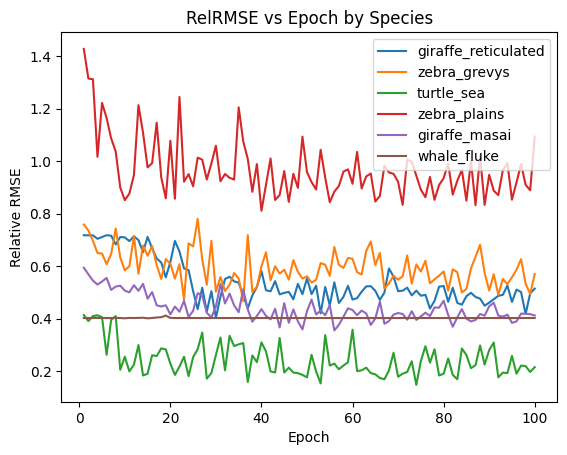

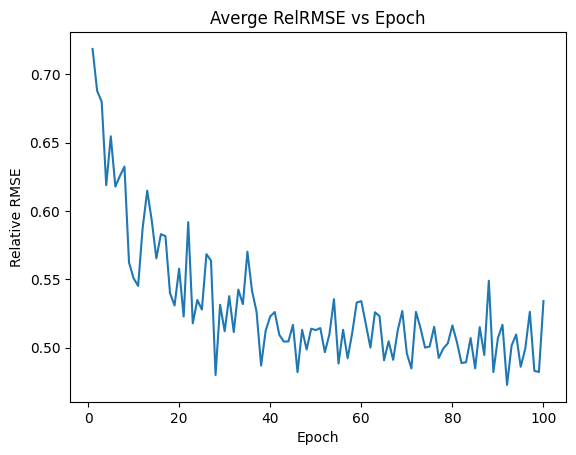

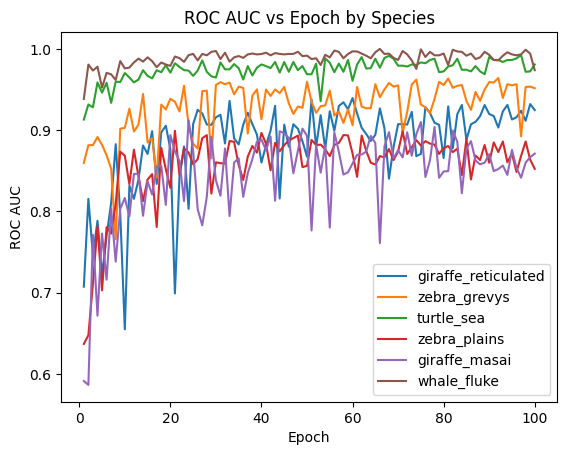

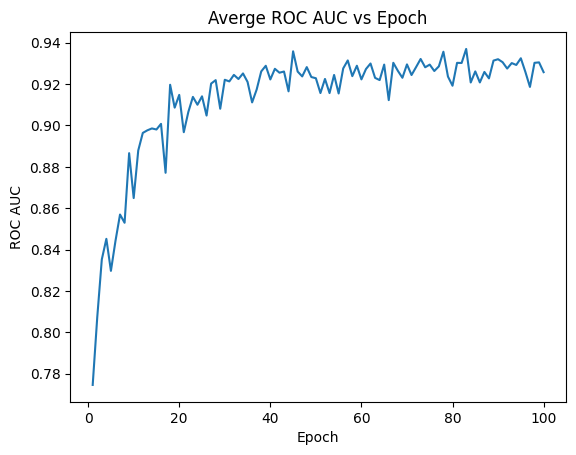

In [ ]:
# relrmses
for i in range(6):
  plt.plot(np.arange(1,101), mses_by_epoch[:,i], label = reduced_classes[i])
plt.legend()
plt.title('RelRMSE vs Epoch by Species')
plt.xlabel('Epoch')
plt.ylabel('Relative RMSE')
plt.show()

# avg relrmse
relrmses = np.mean(mses_by_epoch, axis=1)
plt.plot(np.arange(1,101), relrmses)
plt.title('Averge RelRMSE vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Relative RMSE')
plt.show()

# roc aucs
for i in range(6):
  plt.plot(np.arange(1,101), roc_aucs_by_epoch[:,i], label = reduced_classes[i])
plt.legend()
plt.title('ROC AUC vs Epoch by Species')
plt.xlabel('Epoch')
plt.ylabel('ROC AUC')
plt.show()

# avg roc aucs
roc_aucs = np.mean(roc_aucs_by_epoch, axis=1)
plt.plot(np.arange(1,101), roc_aucs)
plt.title('Averge ROC AUC vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('ROC AUC')
plt.show()

Average RelRMSE drops until about epoch 40 and then gently falls until around epoch 80, where it starts to become unstable. Average ROC AUC increases quickly until about epoch 20 and then slowly increases until around epoch 80. So, we chose 80 for the number of epochs to train our champion model.

### Part f

Use your champion model to evaluate on the test set. Report AUC for each animal species for the classification task. Report the relative root mean squared error for the counting task.

**Training & Testing Champion Model**

In [ ]:
# Create dataloader
nontest_dataset = ClassifyCountDataset(dataset_type = 'trainval', img_size = 128)
test_dataset = ClassifyCountDataset(dataset_type = 'test', img_size = 128)

nontest_dataloader = DataLoader(nontest_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
torch.manual_seed(2023)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# initiate model
bestmodel = VGG16Counting(num_classes=6).to(device)

# Create optimizer
optimizer = optim.Adam(bestmodel.parameters(), lr=1e-4)

In [ ]:
champ_num_epochs = 80
roc_aucs_on_test, relrmses_on_test = train(bestmodel, optimizer, nontest_dataloader,
                                           test_dataloader, num_epochs = champ_num_epochs)

Streaming output truncated to the last 5000 lines.
Average precision for each class>> [0.9595375722543352, 0.9453551912568307, 0.985, 0.8656716417910447, 0.8724489795918368, 1.0]
Mean relative Root mean squared error>> 0.5398219202955564
47: 0
47: 1
47: 2
47: 3
47: 4
47: 5
47: 6
47: 7
47: 8
47: 9
47: 10
47: 11
47: 12
47: 13
47: 14
47: 15
47: 16
47: 17
47: 18
47: 19
47: 20
47: 21
47: 22
47: 23
47: 24
47: 25
47: 26
47: 27
47: 28
47: 29
47: 30
47: 31
47: 32
47: 33
47: 34
47: 35
47: 36
47: 37
47: 38
47: 39
47: 40
47: 41
47: 42
47: 43
47: 44
47: 45
47: 46
47: 47
47: 48
47: 49
47: 50
47: 51
47: 52
47: 53
47: 54
47: 55
47: 56
47: 57
47: 58
47: 59
47: 60
47: 61
47: 62
47: 63
47: 64
47: 65
47: 66
47: 67
47: 68
47: 69
47: 70
47: 71
47: 72
47: 73
47: 74
47: 75
47: 76
47: 77
47: 78
47: 79
47: 80
47: 81
47: 82
47: 83
47: 84
47: 85
47: 86
47: 87
47: 88
47: 89
47: 90
47: 91
47: 92
47: 93
47: 94
47: 95
47: 96
47: 97
47: 98
47: 99
47: 100
47: 101
47: 102
47: 103
47: 104
47: 105
47: 106
47: 107
47: 108


In [ ]:
# Displaying Test Scores
final_relrmses = relrmses_on_test[champ_num_epochs - 1, :]
final_roc_aucs = roc_aucs_on_test[champ_num_epochs - 1, :]

avg_relrmse = np.mean(final_relrmses)
avg_roc_auc = np.mean(final_roc_aucs)

final_relrmses = np.append(final_relrmses, avg_relrmse)
final_roc_aucs = np.append(final_roc_aucs, avg_roc_auc)

labels = reduced_classes.copy()
labels.append('average')
for i in range(7):
  lbl = labels[i]
  relrmse_i = str(round(final_relrmses[i], 2))
  roc_auc_i = str(round(final_roc_aucs[i], 2))
  string = 'RelRMSE = ' + relrmse_i + '  & ROC AUC = ' + roc_auc_i + '  : ' + lbl
  print(string)

RelRMSE = 0.63  & ROC AUC = 0.92  : giraffe_reticulated
RelRMSE = 0.64  & ROC AUC = 0.96  : zebra_grevys
RelRMSE = 0.42  & ROC AUC = 0.99  : turtle_sea
RelRMSE = 0.91  & ROC AUC = 0.88  : zebra_plains
RelRMSE = 0.51  & ROC AUC = 0.91  : giraffe_masai
RelRMSE = 0.26  & ROC AUC = 0.99  : whale_fluke
RelRMSE = 0.56  & ROC AUC = 0.94  : average


### Question 5 (Extra credit)

Since the classification and counting tasks are correlated, can you come up with a different loss function to induce the model's final outputs from the two branches to better capture this correlation and boost the model's performance?  Implement this new model to improve your model performance.  You can also try using pre-train models to improve your model performance.

The original loss function, for $\hat Y_i$ being the predicted numerical response ($Y_i$ true response) for species $i$ and $\hat Y_i'$ being the predicted, logit response ($Y_i'$ true binary response), is given by
$$L_0 = \frac{1}{6}\sum_i (Y_i - \hat Y_i)^2 - \frac{1}{6}\sum_i Y_i' \log\hat Y_i' + (1 - Y_i')\log (1 - \hat Y_i').$$
We don't want to predict a nonzero numerical response for a species that is not in the image, so we suggest adding the following interaction penalty term to $L_0$.

$$\text{interaction penalty} = (1 - Y_i') \cdot \hat Y_i^2$$